In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
#Loading heart_disease_health dataset
heart_disease = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
heart_disease.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
heart_disease.shape

(253680, 22)

**<font size="5">The dataset has 253680 rows and 22 columns.</font>**

**<font size="15">Exploratory Data Analysis.</font>**

In [4]:
#Checking info
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
#Checking for null values
pd.DataFrame({'Count': heart_disease.isnull().sum(), 'Percentage': heart_disease.isnull().sum()/len(heart_disease)})

,Count,Percentage
HeartDiseaseorAttack,0,0.0
HighBP,0,0.0
HighChol,0,0.0
CholCheck,0,0.0
BMI,0,0.0
Smoker,0,0.0
Stroke,0,0.0
Diabetes,0,0.0
PhysActivity,0,0.0
Fruits,0,0.0


**<font size="5">There is no null values in the dataset.</font>**

In [6]:
#Statistical summary
heart_disease.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


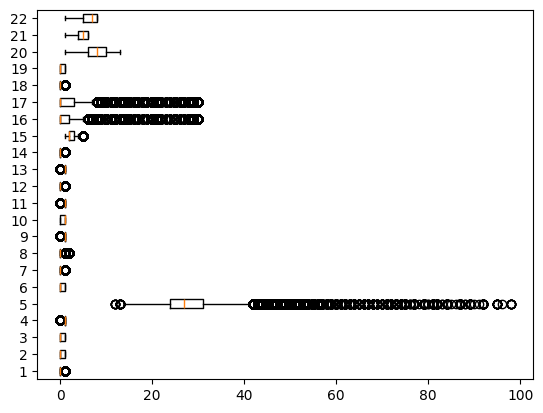

In [7]:
#Checking for outliers by plotting boxplot
plt.boxplot(heart_disease, vert=False)
plt.show()

**<font size="5">There are too many outliers in the dataset.</font>**

In [15]:
#Splitting the dataset
X=heart_disease.drop(["HeartDiseaseorAttack"], axis=1)
y=heart_disease["HeartDiseaseorAttack"]

In [9]:
X.shape

(253680, 21)

**<font size="5">Our feature variable has 253680 rows and 21 columns.</font>**

In [10]:
y.shape

(253680,)

**<font size="5">Our target variable has 253680 rows and 1 columns.</font>**

In [11]:
#Scaling the features
X=RobustScaler().fit_transform(X)

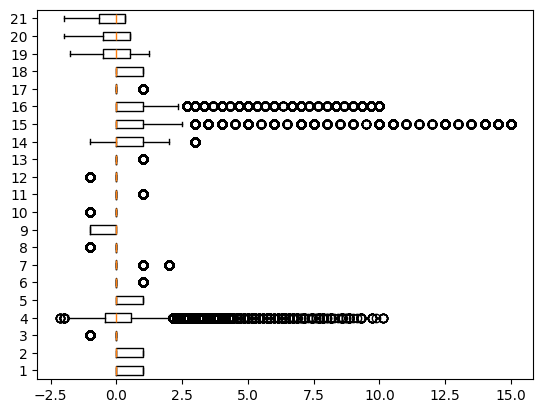

In [12]:
#Checking for scaled features
plt.boxplot(X, vert=False)
plt.show()

**<font size="5">Now our outliers are scaled.</font>**

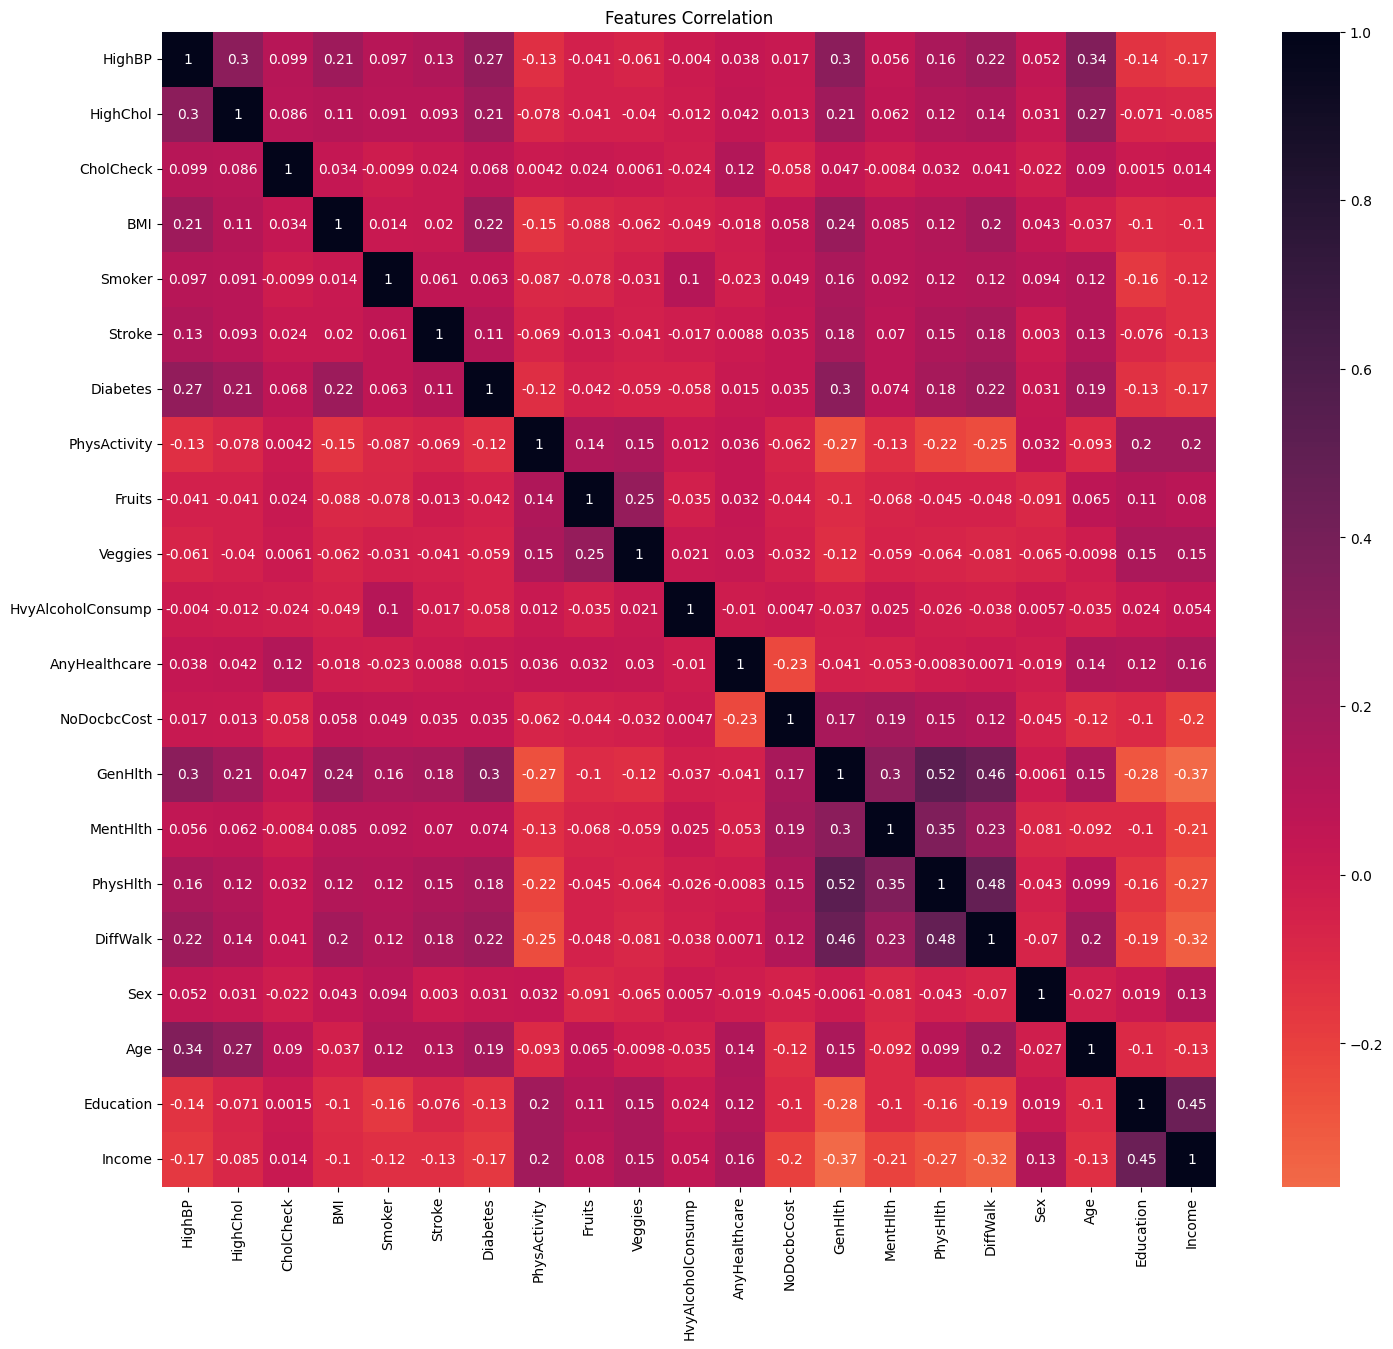

In [16]:
#Setting the fig size
plt.subplots(figsize=(17,15))


#Plotting heatmap
heat_map = sns.heatmap(X.corr(), center = 0, cmap = 'rocket_r', annot = True)
heat_map.set_title('Features Correlation')

#Printing heatmap
plt.show()

In [17]:
#High Correlation filter
X_corr=X.corr()>0.95
X_corr

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HighChol,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CholCheck,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BMI,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Smoker,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Stroke,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Diabetes,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PhysActivity,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Fruits,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Veggies,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


**<font size="5">Our feature is not highly correlated.</font>**

In [18]:
Target_ratio=heart_disease["HeartDiseaseorAttack"].value_counts()/len(heart_disease)
print(Target_ratio)

HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: count, dtype: float64


**<font size="5">0 --->  Healthy Heart</font>**

**<font size="5">1 --->  Defective Heart</font>**

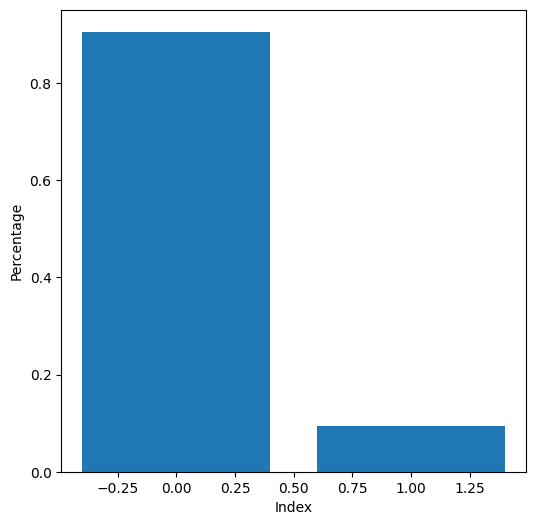

In [19]:
#Checking for imbalancing
plt.figure(figsize=(6,6))
plt.bar(Target_ratio.index, Target_ratio)
plt.xlabel("Index")
plt.ylabel("Percentage")
plt.show()

**<font size="5">Our target variable is highly unbalanced.</font>**

In [20]:
#splitting the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(202944, 21) (50736, 21) (202944,) (50736,)


In [22]:
#Applying SMOTE to handle imblancing
oversample_data=SMOTE()

X_smote,y_smote=oversample_data.fit_resample(X,y)

print(X_smote.shape,y_smote.shape)

(459574, 21) (459574,)


In [23]:
#Checking ratio count 
Target_ratio_smote=y_smote.value_counts()/len(y_smote)
print(Target_ratio_smote)

HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: count, dtype: float64


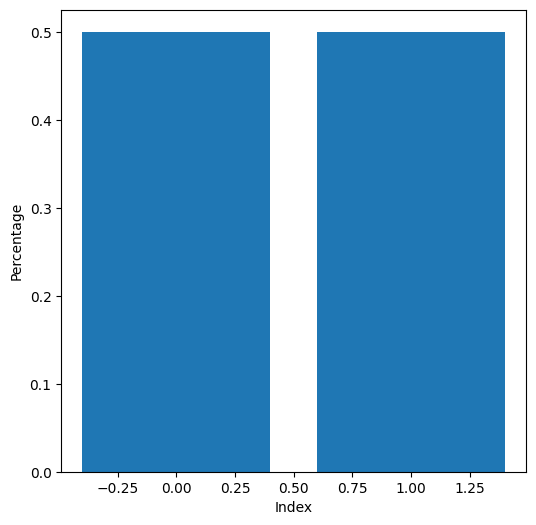

In [24]:
#Checking for class balance
plt.figure(figsize=(6,6))
plt.bar(Target_ratio_smote.index, Target_ratio_smote)
plt.xlabel("Index")
plt.ylabel("Percentage")
plt.show()

**<font size="5">Now our target column is balanced.</font>**

In [25]:
#Splitting the dataset again into train and test
X_train_smote, X_test_smote, y_train_smote, y_test_smote=train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)

#Converting to dataframe
X_train_smote=pd.DataFrame(X_train_smote)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(202944, 21) (50736, 21) (202944,) (50736,)


**<font size="10">Model Selection</font>**

**<font size="6">Logistic Regression Model</font>**

**<font size="6">Hyperparameter Tuning.</font>**

In [31]:
#Define parameter grid
param_grid={
'C': [0.5,1.0,1.5,2.0],
'solver': ['saga','liblinear'],
'multi_class': ['ovr']
}

#Setting up grid search cv
grid_search=GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)  

#Print the best parameters
print(f"The best parameters are: {grid_search.best_params_}")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

The best parameters are: {'C': 1.5, 'multi_class': 'ovr', 'solver': 'saga'}


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
#Instantiating the model
log_reg=LogisticRegression(C=1.5, solver='saga', multi_class='ovr')

#Performing fit
log_reg.fit(X_train_smote,y_train_smote)

#Generating prediction
y_pred_smote=log_reg.predict(X_test_smote)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
#Checking for accuracy
print('Accuracy:', accuracy_score(y_test_smote,y_pred_smote))

Accuracy: 0.7840722406571289


**<font size="5">The accuracy of our model is 78.40%.</font>**

In [28]:
#Generating classification report
print('Classification Report:\n', classification_report(y_test_smote,y_pred_smote))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.76      0.78     46002
         1.0       0.77      0.81      0.79     45913

    accuracy                           0.78     91915
   macro avg       0.79      0.78      0.78     91915
weighted avg       0.79      0.78      0.78     91915



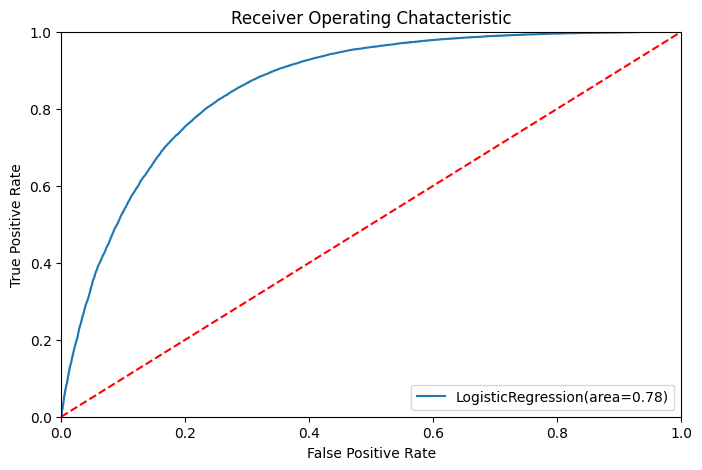

In [33]:
#ROC-AUC curve
plt.figure(figsize=(8,5))

#Compute ROC curve
log_roc_auc=metrics.roc_auc_score(y_test_smote,y_pred_smote)
lfpr,ltpr,thresholds=metrics.roc_curve(y_test_smote,log_reg.predict_proba(X_test_smote)[:,1])

#plotting the curve
plt.plot(lfpr,ltpr,label='LogisticRegression(area=%0.2f)'%log_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Chatacteristic')
plt.legend(loc='lower right')
plt.show()

**<font size="5">An ROC-AUC of 0.7 indicates that the model is good at distinguishing b/w the two classes but is not a perfect model.</font>**

In [34]:
#Most important drivers
imp_features=pd.DataFrame({'Features':X_train_smote.columns, 'Coefficient':np.round(log_reg.coef_[0], 3)})
print('List of most important drivers for heart disease or attack:\n', imp_features)

List of most important drivers for heart disease or attack:
              Features  Coefficient
0              HighBP        0.677
1            HighChol        0.776
2           CholCheck        0.740
3                 BMI       -0.001
4              Smoker        0.449
5              Stroke        1.208
6            Diabetes        0.117
7        PhysActivity        0.135
8              Fruits        0.052
9             Veggies        0.148
10  HvyAlcoholConsump       -0.580
11      AnyHealthcare        0.113
12        NoDocbcCost        0.231
13            GenHlth        0.580
14           MentHlth        0.006
15           PhysHlth       -0.002
16           DiffWalk        0.285
17                Sex        0.965
18                Age        0.281
19          Education        0.012
20             Income       -0.058


**<font size="5">The most important drivers for heart disease predictions are Stroke, Sex, HighCol, CholCheck and HighBP.</font>** 

**<font size="6">Random Forest Classifier</font>**

**<font size="6">Hyperparameter Tuning.</font>**

In [29]:
#Define parameter grid
param_grid1={
'criterion': ['gini','entropy'],
'n_estimators': [100,150,200,300],
'max_depth': [3,5]
}

#Setting up grid search cv
grid_search1=GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid1, cv=5, scoring='accuracy')
grid_search1.fit(X_train_smote, y_train_smote)  

#Print the best parameters
print(f"The best parameters are: {grid_search1.best_params_}")

The best parameters are: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}


In [35]:
#Instantiating the model
rf_c=RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=5)

#Performing fit
rf_c.fit(X_train_smote, y_train_smote)

#Generating prediction
rf_pred=rf_c.predict(X_test_smote)

In [36]:
#Checking for accuracy
print('Accuracy:', accuracy_score(y_test_smote,rf_pred))

Accuracy: 0.8585432192786814


**<font size="5">The accuracy of our model is 85.85%.</font>**

In [37]:
#Generating classification report
print('Classification Report:\n', classification_report(y_test_smote,rf_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     46002
         1.0       0.84      0.89      0.86     45913

    accuracy                           0.86     91915
   macro avg       0.86      0.86      0.86     91915
weighted avg       0.86      0.86      0.86     91915



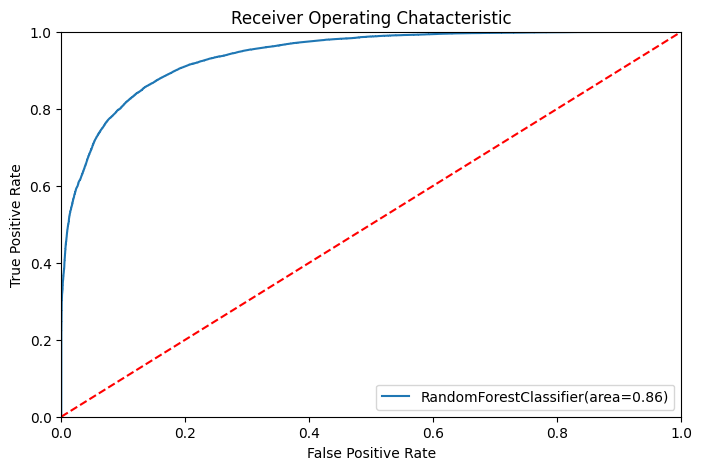

In [42]:
#ROC-AUC curve
plt.figure(figsize=(8,5))

#Compute ROC curve
rfc_roc_auc=metrics.roc_auc_score(y_test_smote,rf_pred)
rfpr,rtpr,thresholds=metrics.roc_curve(y_test_smote,rf_c.predict_proba(X_test_smote)[:,1])

#plotting the curve
plt.plot(rfpr,rtpr,label='RandomForestClassifier(area=%0.2f)'%rfc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Chatacteristic')
plt.legend(loc='lower right')
plt.show()

**<font size="5">An ROC-AUC of 0.8 indicates that the model is good at distinguishing b/w the two classes but is not a perfect model.</font>** 

In [46]:
#Most important drivers
imp_features=pd.DataFrame({'Features':X_train_smote.columns, 'Importance':np.round(rf_c.feature_importances_, 3)})
print('List of most important drivers for heart disease or attack:\n', imp_features)

List of most important drivers for heart disease or attack:
              Features  Importance
0              HighBP       0.240
1            HighChol       0.165
2           CholCheck       0.001
3                 BMI       0.000
4              Smoker       0.075
5              Stroke       0.051
6            Diabetes       0.016
7        PhysActivity       0.019
8              Fruits       0.005
9             Veggies       0.004
10  HvyAlcoholConsump       0.002
11      AnyHealthcare       0.000
12        NoDocbcCost       0.001
13            GenHlth       0.131
14           MentHlth       0.001
15           PhysHlth       0.007
16           DiffWalk       0.081
17                Sex       0.077
18                Age       0.104
19          Education       0.010
20             Income       0.011


**<font size="5">The most important drivers for heart disease predictions are  HighBP, HighChol, GenHlth, Age and DiffWalk.</font>**

**<font size="10">XGBoosting Model</font>**

**<font size="6">Hyperparameter Tuning</font>**

In [ ]:
#Define parameter grid
param_grid3={
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 2, 3]
}

#Setting up grid search cv
grid_search3=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid3, cv=5, scoring='accuracy')
grid_search3.fit(X_train_smote, y_train_smote)  

#Print the best parameters
print(f"The best parameters are: {grid_search3.best_params_}")

In [31]:
#Instantiating the model
xgb=XGBClassifier(n_estimators=200, learning_rate=1.0, max_depth=2, random_state=40)

#Performing fit
xgb.fit(X_train_smote,y_train_smote)

#Generating prediction
xgb_pred=xgb.predict(X_test_smote)

In [47]:
#Checking for accuracy
print('Accuracy:', accuracy_score(y_test_smote,xgb_pred))

Accuracy: 0.9453734428548115


**<font size="5">The accuracy of our model is 94.53%.</font>**

In [48]:
#Generating classification report
print('Classification Report:\n', classification_report(y_test_smote,xgb_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46002
         1.0       0.99      0.90      0.94     45913

    accuracy                           0.95     91915
   macro avg       0.95      0.95      0.95     91915
weighted avg       0.95      0.95      0.95     91915



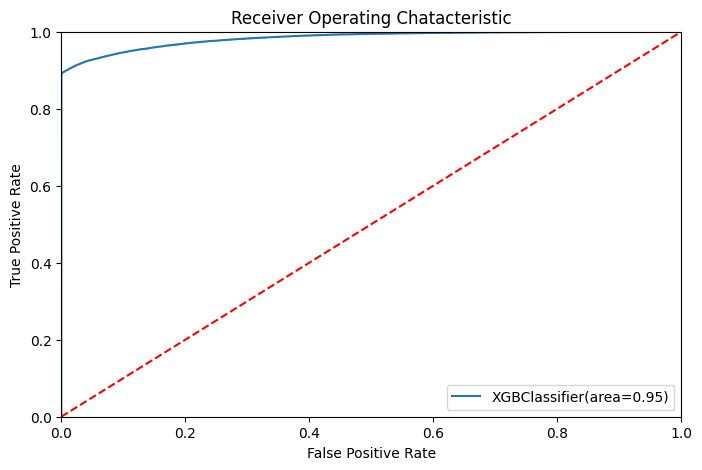

In [39]:
#ROC-AUC curve
plt.figure(figsize=(8, 5))

#Compute ROC curve
knn_roc_auc=metrics.roc_auc_score(y_test_smote,xgb_pred)
kfpr,ktpr,thresholds=metrics.roc_curve(y_test_smote,xgb.predict_proba(X_test_smote)[:,1])

#plotting the curve
plt.plot(kfpr,ktpr,label='XGBClassifier(area=%0.2f)'%knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Chatacteristic')
plt.legend(loc='lower right')
plt.show()

**<font size="5">An ROC-AUC of 0.9 indicates that the model is good at distinguishing b/w the two classes but is not a perfect model.</font>**

In [43]:
imp_features=pd.DataFrame({'Features':X_train_smote.columns, 'Importance':np.round(xgb.feature_importances_, 3)})
print('List of most important drivers for heart disease or attack:\n', imp_features)

List of most important drivers for heart disease or attack:
              Features  Importance
0              HighBP       0.360
1            HighChol       0.105
2           CholCheck       0.011
3                 BMI       0.002
4              Smoker       0.091
5              Stroke       0.029
6            Diabetes       0.003
7        PhysActivity       0.067
8              Fruits       0.067
9             Veggies       0.073
10  HvyAlcoholConsump       0.020
11      AnyHealthcare       0.001
12        NoDocbcCost       0.005
13            GenHlth       0.040
14           MentHlth       0.002
15           PhysHlth       0.004
16           DiffWalk       0.036
17                Sex       0.038
18                Age       0.022
19          Education       0.016
20             Income       0.008


**<font size="5">The most important drivers for heart disease predictions are HighBP, HighChol, Smoker, Veggies, PhysActivity and Fruits.</font>**

**<font size="5">From the above model evaluation we got that XGBoosting is the best performing model as it fits 94% of the data points.</font>**

**<font size="15">Building a predicting system.</font>**

In [34]:
input_data_1 = (1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0)

#Change to numpy array
input_data = np.asarray(input_data_1)

#Reshaping the nympy array as we are predicting for only one instance
input_data_res = input_data.reshape(1,-1)

#Generating prediction
prediction = xgb.predict(input_data_res)
print(prediction)

[0]


**<font size="5">The model predicted correctly that the person is not having any heart disease.</font>**

**<font size="6">Thank You</font>**